In [27]:
#import dependencies 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

from config import weather_api_key
import requests

# Import the time library and the datetime module from the datetime library 
import time 
from datetime import datetime

# Import linregress
from scipy.stats import linregress

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low =-90.000, high=90.000,size=1500)
lngs =np.random.uniform(low=-180.00,high=180.000,size=1500)

#pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

lats_lngs = zip(lats,lngs)
lats_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

coordinates

[(67.03483175165496, -173.92455936482247),
 (80.11973458207649, -66.14746343692997),
 (-12.399560236446234, -112.49577565232825),
 (27.520564977637903, -133.37725678928132),
 (20.312832485055907, -18.63387182071554),
 (-18.382460479384577, 126.09470857811249),
 (13.411533710271485, -60.026234127600304),
 (-26.783130855422016, 178.50382425505705),
 (-59.77255064898646, -7.907831201352906),
 (-61.009833581836276, 44.524140234721244),
 (33.21206157541735, 11.555266864582563),
 (46.34213601496347, 160.81749427122048),
 (10.647356766193596, 139.8912812181449),
 (-60.201939320808265, -58.370241302664354),
 (-45.20771012531111, 67.8285577924172),
 (44.96573695171858, -37.593243741838705),
 (61.21016064532566, -43.937652660423765),
 (-12.933237908046934, -93.02620575775023),
 (-20.400036512218506, -8.668406213986998),
 (4.6161088093881375, 19.694929466559756),
 (26.025295309784383, -107.77616225783487),
 (-17.88653441064949, -61.48315200743943),
 (-44.61377200739432, -33.00169699841868),
 (-49

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


pevek ru
kodiak us
rudovci rs
cocachacra pe
rikitea pf
port alfred za
tumannyy ru
gragnano it
illoqqortoormiut gl
kapaa us
busselton au
arraial do cabo br
mataura pf
cape town za
hithadhoo mv
rikitea pf
hambantota lk
petropavlovsk-kamchatskiy ru
wamba cd
puerto ayora ec
nakhon nayok th
abha sa
alyangula au
ushuaia ar
lekoni ga
sangeorz-bai ro
jamestown sh
lagoa pt
cam pha vn
yunjinghong cn
mataura pf
chokurdakh ru
bluff nz
ushuaia ar
hilo us
dzhusaly kz
arraial do cabo br
kisangani cd
vaini to
upernavik gl
matara lk
busselton au
pevek ru
horodnytsya ua
albany au
acapulco mx
khatanga ru
hilo us
lebu cl
saint george bm
mataura pf
punta arenas cl
semnan ir
bosilegrad rs
korsakov ru
castro cl
airai pw
kavieng pg
khatanga ru
palabuhanratu id
new norfolk au
ushuaia ar
mahebourg mu
hovd mn
hithadhoo mv
tsihombe mg
cape town za
iwaki jp
dasoguz tm
punta arenas cl
nanortalik gl
nilopolis br
cabatuan ph
umzimvubu za
mataura pf
borlange se
belushya guba ru
deputatskiy ru
nha trang vn
hermanus za


san patricio mx
new norfolk au
jamestown sh
saint-philippe re
albany au
punta arenas cl
alofi nu
hilo us
vila vu
mataura pf
katsuura jp
taolanaro mg
qaanaaq gl
norman wells ca
qaanaaq gl
arraial do cabo br
lisala cd
kapaa us
yerbogachen ru
khatanga ru
sentyabrskiy ru
tasiilaq gl
opuwo na
avarua ck
port alfred za
chokurdakh ru
ushuaia ar
norton zw
atuona pf
rikitea pf
ahuimanu us
tiksi ru
airai pw
ushuaia ar
rikitea pf
banda aceh id
rikitea pf
new norfolk au
georgetown sh
east london za
londoko ru
chichimila mx
bredasdorp za
port hedland au
boca do acre br
punta arenas cl
cabo san lucas mx
tsihombe mg
bredasdorp za
bowling green us
taolanaro mg
bethel us
qaanaaq gl
yulara au
la romana do
tyret pervaya ru
albany au
newport us
fortuna us
zaozerne ua
punta arenas cl
ushuaia ar
yellowknife ca
terenos br
coquimbo cl
seoul kr
ushuaia ar
ushuaia ar
vaini to
nikolskoye ru
ushuaia ar
cabo san lucas mx
korla cn
tiksi ru
peski ru
aripuana br
virginia beach us
georgetown sh
shingu jp
rorvik no
harr

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [13]:
#build the url for the OpenWEatherMap with weather_api_key  and add to the url 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
#using enumerate ,loop through the cities in the list 
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print(f" Begining Data Retrieval")
print("-------------------------")

#create counters
#In the code block, we have initialized the counters at 1,we want the first iteration of the logging
#for each recorded response and the set to start at 1.
record_count =1
set_count =1

# Loop through all the cities in the list.
for i ,city in enumerate(cities):
     # Group cities in sets of 50 for logging purposes.
        if (i%50 == 0 and i >=50):
            set_count+=1
            record_count=1
            time.sleep(60)
        # Create endpoint URL with each city.
        city_url = url+ "&q="+city.replace(" ","+")
        #log the URL,record and set numbers and the city.
        print(f" Processing record {record_count} of set {set_count}|{city}")
        #add 1 to the record count 
        record_count+=1
        # Run an API request for each of the cities.
        try:
        # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 Begining Data Retrieval
-------------------------
 Processing record 1 of set 1|pevek
 Processing record 2 of set 1|kodiak
 Processing record 3 of set 1|rudovci
 Processing record 4 of set 1|cocachacra
 Processing record 5 of set 1|rikitea
 Processing record 6 of set 1|port alfred
 Processing record 7 of set 1|tumannyy
City not found. Skipping...
 Processing record 8 of set 1|gragnano
 Processing record 9 of set 1|illoqqortoormiut
City not found. Skipping...
 Processing record 10 of set 1|kapaa
 Processing record 11 of set 1|busselton
 Processing record 12 of set 1|arraial do cabo
 Processing record 13 of set 1|mataura
 Processing record 14 of set 1|cape town
 Processing record 15 of set 1|hithadhoo
 Processing record 16 of set 1|hambantota
 Processing record 17 of set 1|petropavlovsk-kamchatskiy
 Processing record 18 of set 1|wamba
 Processing record 19 of set 1|puerto ayora
 Processing record 20 of set 1|nakhon nayok
 Processing record 21 of set 1|abha
 Processing record 22 of set 1

 Processing record 40 of set 4|sorong
 Processing record 41 of set 4|kupang
 Processing record 42 of set 4|cap malheureux
 Processing record 43 of set 4|ibra
 Processing record 44 of set 4|carnarvon
 Processing record 45 of set 4|yellowknife
 Processing record 46 of set 4|cabo san lucas
 Processing record 47 of set 4|mazarron
 Processing record 48 of set 4|vaitupu
City not found. Skipping...
 Processing record 49 of set 4|attawapiskat
City not found. Skipping...
 Processing record 50 of set 4|sisimiut
 Processing record 1 of set 5|shush
 Processing record 2 of set 5|klaksvik
 Processing record 3 of set 5|santa teresa
 Processing record 4 of set 5|kamenskoye
City not found. Skipping...
 Processing record 5 of set 5|najran
 Processing record 6 of set 5|itarema
 Processing record 7 of set 5|sain alto
 Processing record 8 of set 5|port keats
 Processing record 9 of set 5|cidreira
 Processing record 10 of set 5|rio grande
 Processing record 11 of set 5|kirakira
 Processing record 12 of set 

 Processing record 37 of set 8|londoko
 Processing record 38 of set 8|chichimila
 Processing record 39 of set 8|port hedland
 Processing record 40 of set 8|boca do acre
 Processing record 41 of set 8|bowling green
 Processing record 42 of set 8|yulara
 Processing record 43 of set 8|la romana
 Processing record 44 of set 8|tyret pervaya
 Processing record 45 of set 8|newport
 Processing record 46 of set 8|terenos
 Processing record 47 of set 8|korla
 Processing record 48 of set 8|peski
 Processing record 49 of set 8|aripuana
 Processing record 50 of set 8|virginia beach
 Processing record 1 of set 9|shingu
 Processing record 2 of set 9|rorvik
 Processing record 3 of set 9|harrison
 Processing record 4 of set 9|ewo
 Processing record 5 of set 9|champerico
 Processing record 6 of set 9|batticaloa
 Processing record 7 of set 9|pakxan
 Processing record 8 of set 9|vangaindrano
 Processing record 9 of set 9|siocon
 Processing record 10 of set 9|teterow
 Processing record 11 of set 9|joplin
 

 Processing record 31 of set 12|pemberton
 Processing record 32 of set 12|cuamba
 Processing record 33 of set 12|agutaya
 Processing record 34 of set 12|ilva mare
 Processing record 35 of set 12|sidi ali
 Processing record 36 of set 12|rocha
 Processing record 37 of set 12|kazalinsk
City not found. Skipping...
 Processing record 38 of set 12|umm lajj
 Processing record 39 of set 12|pouebo
 Processing record 40 of set 12|lavra
 Processing record 41 of set 12|valparaiso
 Processing record 42 of set 12|noumea
 Processing record 43 of set 12|oyem
 Processing record 44 of set 12|kroya
 Processing record 45 of set 12|vagay
 Processing record 46 of set 12|belaya gora
 Processing record 47 of set 12|hualmay
 Processing record 48 of set 12|danshui
 Processing record 49 of set 12|rabo de peixe
 Processing record 50 of set 12|kwekwe
 Processing record 1 of set 13|cruzeiro do sul
 Processing record 2 of set 13|myrtle grove
 Processing record 3 of set 13|weston
 Processing record 4 of set 13|gizo
 

In [15]:
print(len(city_data))

576


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
#city_data_df.columns


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-6.56,78,100,2.80,RU,2022-02-02 04:16:15
1,Kodiak,57.7900,-152.4072,36.91,87,100,10.36,US,2022-02-02 04:16:15
2,Rudovci,44.3801,20.4051,30.34,93,48,4.05,RS,2022-02-02 04:16:16
3,Cocachacra,-17.0883,-71.7575,69.60,84,62,4.72,PE,2022-02-02 04:16:16
4,Rikitea,-23.1203,-134.9692,78.39,69,93,4.90,PF,2022-02-02 04:15:37
5,Port Alfred,-33.5906,26.8910,77.36,74,98,7.54,ZA,2022-02-02 04:13:21
6,Gragnano,40.6956,14.5123,45.25,75,2,4.83,IT,2022-02-02 04:16:17
7,Kapaa,22.0752,-159.3190,76.98,74,75,1.99,US,2022-02-02 04:12:13
8,Busselton,-33.6500,115.3333,85.05,33,37,11.01,AU,2022-02-02 04:16:18
9,Arraial Do Cabo,-22.9661,-42.0278,75.69,87,100,7.34,BR,2022-02-02 04:16:18


In [17]:
#re-order the columns 
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)
                  



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-02-02 04:16:15,69.7008,170.3133,-6.56,78,100,2.80
1,Kodiak,US,2022-02-02 04:16:15,57.7900,-152.4072,36.91,87,100,10.36
2,Rudovci,RS,2022-02-02 04:16:16,44.3801,20.4051,30.34,93,48,4.05
3,Cocachacra,PE,2022-02-02 04:16:16,-17.0883,-71.7575,69.60,84,62,4.72
4,Rikitea,PF,2022-02-02 04:15:37,-23.1203,-134.9692,78.39,69,93,4.90
5,Port Alfred,ZA,2022-02-02 04:13:21,-33.5906,26.8910,77.36,74,98,7.54
6,Gragnano,IT,2022-02-02 04:16:17,40.6956,14.5123,45.25,75,2,4.83
7,Kapaa,US,2022-02-02 04:12:13,22.0752,-159.3190,76.98,74,75,1.99
8,Busselton,AU,2022-02-02 04:16:18,-33.6500,115.3333,85.05,33,37,11.01
9,Arraial Do Cabo,BR,2022-02-02 04:16:18,-22.9661,-42.0278,75.69,87,100,7.34


In [51]:
#create the output file(csv)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [52]:
#Extract relevant fields from DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


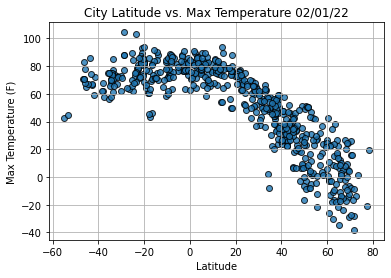

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_Latitude_vs_MaxTemperature.png")

# Show plot.
plt.show()

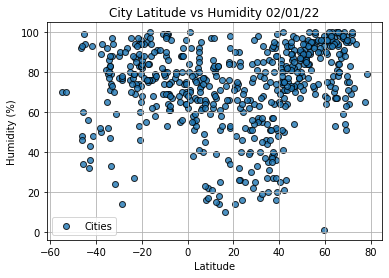

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor = "black",marker = "o",alpha = 0.8,label = "Cities")
plt.legend()
plt.title(f"City Latitude vs Humidity {time}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("weather_data/City_Latitude_vs_Humidity.png")
plt.show()

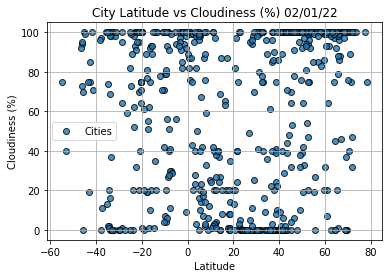

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor = "black",marker = "o",alpha = 0.8,label = "Cities")
plt.legend()
plt.title(f"City Latitude vs Cloudiness (%) {time}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("weather_data/City_Latitude_vs_Cloudiness.png")
plt.show()

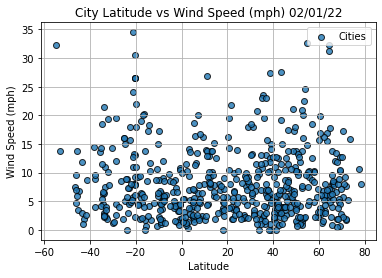

In [23]:
# Build the scatter plots for latitude vs.Wind Speed .
plt.scatter(lats,wind_speed,edgecolor = "black",marker = "o",alpha = 0.8,label = "Cities")
plt.legend()
plt.title(f"City Latitude vs Wind Speed (mph) {time}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("weather_data/City_Latitude_vs_WinndSpeed.png")
plt.show()

In [112]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

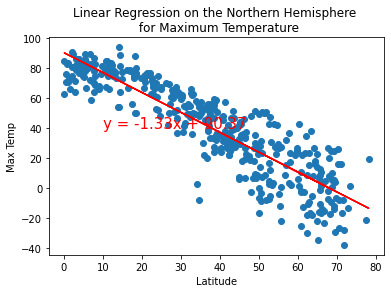

The r_value for Northern Hemisphers is -0.888


In [114]:
# Linear regression on the Northern Hemisphere for Latitude and Maximum temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f"The r_value for Northern Hemisphers is {r_value: .3f}")


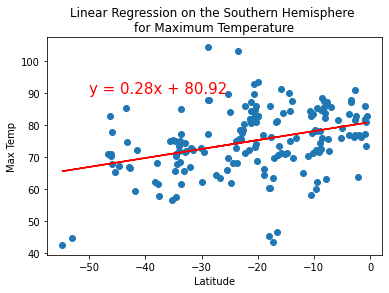

The r_value for Southern Hemisphers is  0.350


In [115]:
#  Linear regression on the Southern Hemisphere for Latitudes and Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f"The r_value for Southern Hemisphers is {r_value: .3f}")

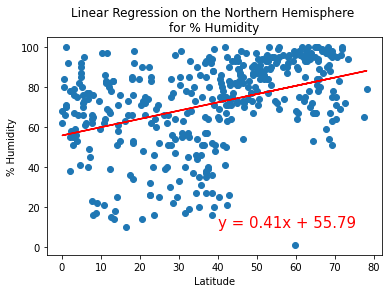

The r_value for the northern hemisphere  0.390


In [116]:
#linear regression on the Northern Hemisphere for latitude and humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f'The r_value for the northern hemisphere {r_value: .3f}')

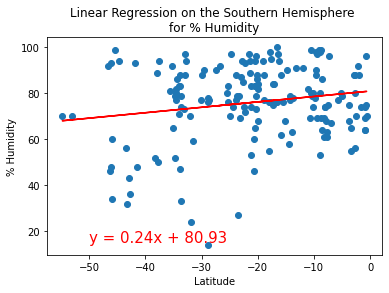

The r_value for the Southern hemisphere  0.184


In [117]:
#linear regression on the Southern Hemisphere for latitude and humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f'The r_value for the Southern hemisphere {r_value: .3f}')

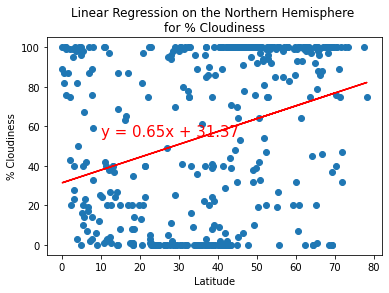

The r_value for the Northern hemisphere  0.321


In [118]:
#linear regression on the Northern Hemisphere for latitude and percent cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(10,55))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f'The r_value for the Northern hemisphere {r_value: .3f}')

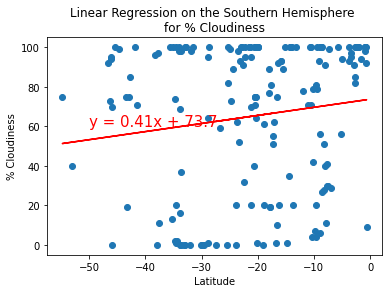

The r_value for the Southern hemisphere  0.141


In [119]:
# Linear regression on the Southern Hemisphere for Latitude and percent Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f'The r_value for the Southern hemisphere {r_value: .3f}')

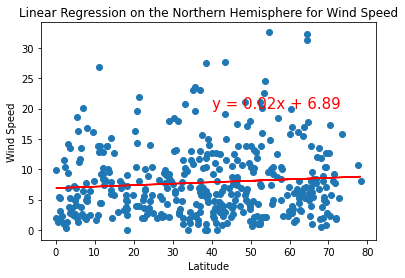

 The r_value for the wind speed is  0.09


In [126]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,20))

#to claculate R_value 
(slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
print(f' The r_value for the wind speed is {r_value : .2f}')

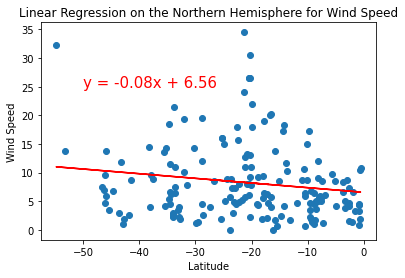

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(-50,25))


print(f'The r_value for the Southern hemisphere {r_value: .3f}')